# Upgrades the training method with verbose, Graphs, and steps
* Verbose is a boolean that defines whether or not to print information about the training. If True, print Cost after {iteration} iterations: {cost} every step iterations:
- Graph is a boolean that defines whether or not to graph information about the training once the training has completed. If True:
Plot the training data every step iterations as a blue line
Label the x-axis as iteration
Label the y-axis as cost
Title the plot Training Cost
* Only if either verbose or graph are True:
if step is not an integer, raise a TypeError with the exception step must be an integer
if step is not positive or is greater than iterations, raise a ValueError with the exception step must be positive and <= iterations


In [3]:
#!/usr/bin/env python3


import numpy as np
import matplotlib.pyplot as plt


class Neuron:
    """
    Neuron class with upgraded train method
    """
    def __init__(self, nx):
        """
        Initializer
        """
        if not isinstance(nx, int):
            raise TypeError('nx must be an integer')
        if nx < 1:
            raise ValueError('nx must be positive')

        self.__W = np.random.randn(nx).reshape(1, nx)
        self.__b = 0
        self.__A = 0

    @property
    def W(self):
        return self.__W

    @property
    def b(self):
        return self.__b

    @property
    def A(self):
        return self.__A

    def forward_prop(self, X):
        """
        Calculates the forward propagation of the neuron
        """
        Z = np.matmul(self.__W, X) + self.__b
        self.__A = 1 / (1 + np.exp(-Z))
        return self.__A

    def cost(self, Y, A):
        """
        Calculates the cost of the model using logistic regression
        """
        m = Y.shape[1]
        m_loss = np.sum((Y * np.log(A) + (1 - Y) * np.log((1.0000001 - A))))
        costs = (1 / m) * (-m_loss)
        return costs

    def evaluate(self, X, Y):
        """
        Evaluates the Neuron's predictions
        """
        A = self.forward_prop(X)
        cost = self.cost(Y, A)
        prediction = np.where(A >= 0.5, 1, 0)
        return prediction, cost

    def gradient_descent(self, X, Y, A, alpha=0.05):
        """
        Calculates the gradient descent
        X is a numpy array with shape (nx, m) that contains the input data
        Y is a numpy.ndarray with shape (1, m) that contains the correct labels for the input data
        A is a numpy.ndarray with shape (1, m) containing the activated output of the neuron for each example
        alpha is the learning rate
        """
        m = Y.shape[1]
        dz = A - Y
        d__W = (1 / m) * (np.matmul(X, dz.transpose())).transpose()
        d__b = (1 / m) * (np.sum(dz))
        self.__W = self.__W - alpha * d__W
        self.__b = self.__b - alpha * d__b
    
    def train(self, X, Y, iterations=5000, alpha=0.05, verbose=True, graph=True,
              step=100):
        """
        Trains the neuron
        """
        if not isinstance(iterations, int):
            raise TypeError("iterations must be an integer")
        if iterations <= 0:
            raise ValueError("iterations must be a positive integer")
        if not isinstance(alpha, float):
            raise TypeError("alpha must be a float")
        if alpha <= 0:
            raise ValueError("alpha must be positive")
        
        if graph is True:
            points = np.arange(0, iterations + 1, step)
            step_points = []
        
        for itr in range(iterations):
            A = self.forward_prop(X)
            if verbose and itr % step == 0:
                cost = self.cost(Y, A)
                print(f"Cost after {itr} iterations: {cost}")
            if graph and itr % step == 0:
                step_points.append(self.cost(Y, A))
            self.gradient_descent(X, Y, A, alpha)
        
        if verbose:
            cost = self.cost(Y, A)
            print(f"Cost after {iterations} iterations: {cost}")
        
        if graph is True:
            step_points.append(self.cost(Y, A))
            plt.plot(points, step_points, "b")
            plt.xlabel("iteration")
            plt.ylabel("cost")
            plt.title("Training Cost")
            plt.show()
        
        return self.evaluate(X, Y)

Cost after 0 iterations: 4.365104944262272
Cost after 100 iterations: 0.11955134491351883
Cost after 200 iterations: 0.06938371517453769
Cost after 300 iterations: 0.051115367434193676
Cost after 400 iterations: 0.04181618721740491
Cost after 500 iterations: 0.036101088647209095
Cost after 600 iterations: 0.03218475537062149
Cost after 700 iterations: 0.029306120337066446
Cost after 800 iterations: 0.02708241901450858
Cost after 900 iterations: 0.02529996529790904
Cost after 1000 iterations: 0.023830413365464702
Cost after 1100 iterations: 0.022592094309234496
Cost after 1200 iterations: 0.021530466092216923
Cost after 1300 iterations: 0.02060757294259626
Cost after 1400 iterations: 0.019796059738018044
Cost after 1500 iterations: 0.019075615989512632
Cost after 1600 iterations: 0.01843077667359662
Cost after 1700 iterations: 0.017849512369096075
Cost after 1800 iterations: 0.017322295437480775
Cost after 1900 iterations: 0.0168414627481454
Cost after 2000 iterations: 0.016400768740647

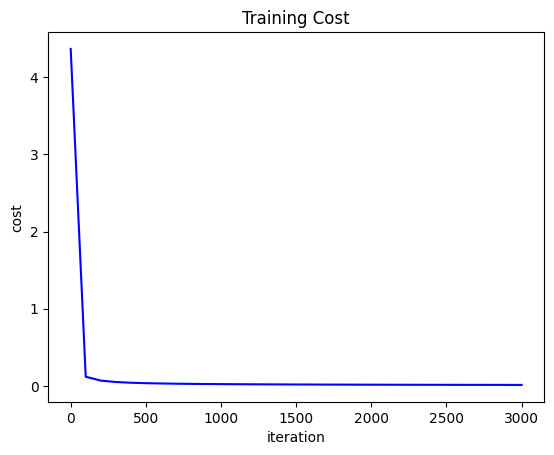

Train cost: 0.013386353289868338
Train accuracy: 99.66837741808132%
Dev cost: 0.01080348451516721
Dev accuracy: 99.81087470449172%


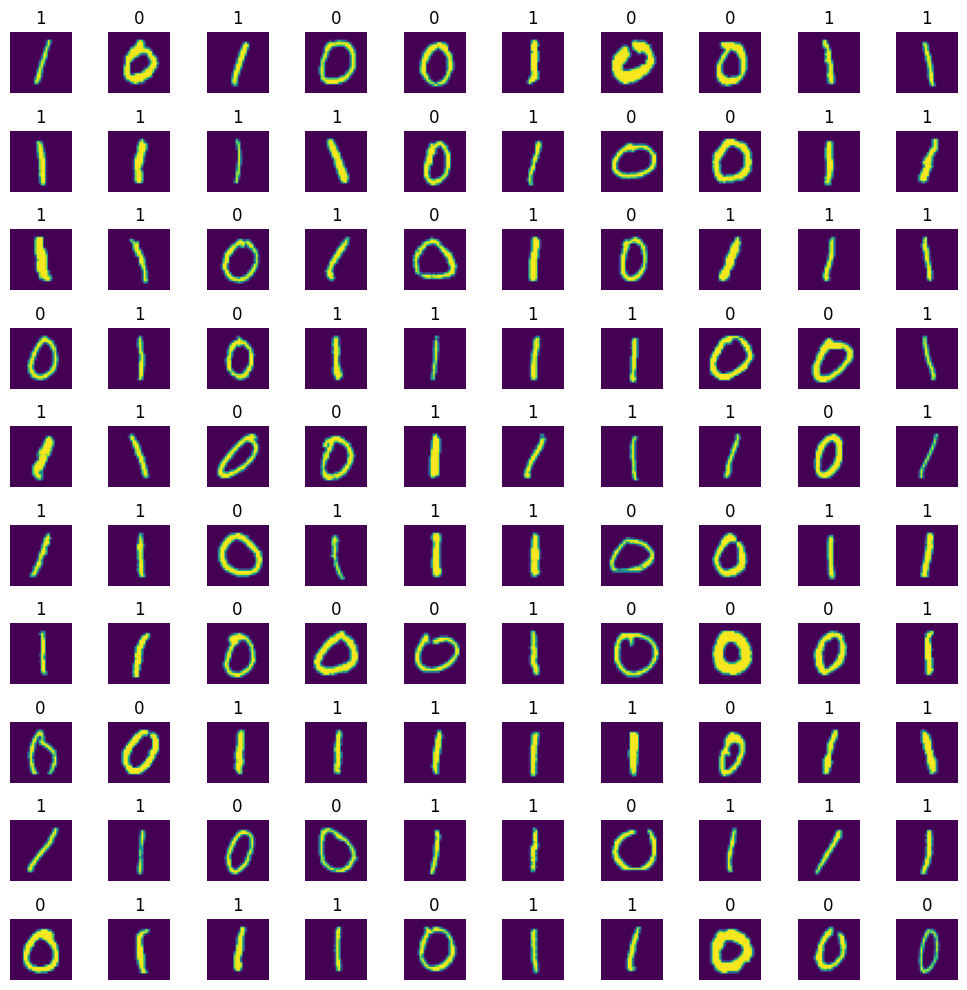

In [4]:
# Main Function

lib_train = np.load('../data/Binary_Train.npz')
X_train_3D, Y_train = lib_train['X'], lib_train['Y']
X_train = X_train_3D.reshape((X_train_3D.shape[0], -1)).T
lib_dev = np.load('../data/Binary_Dev.npz')
X_dev_3D, Y_dev = lib_dev['X'], lib_dev['Y']
X_dev = X_dev_3D.reshape((X_dev_3D.shape[0], -1)).T

np.random.seed(0)
neuron = Neuron(X_train.shape[0])
A, cost = neuron.train(X_train, Y_train, iterations=3000)
accuracy = np.sum(A == Y_train) / Y_train.shape[1] * 100
print("Train cost:", cost)
print("Train accuracy: {}%".format(accuracy))
A, cost = neuron.evaluate(X_dev, Y_dev)
accuracy = np.sum(A == Y_dev) / Y_dev.shape[1] * 100
print("Dev cost:", cost)
print("Dev accuracy: {}%".format(accuracy))
fig = plt.figure(figsize=(10, 10))
for i in range(100):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X_dev_3D[i])
    plt.title(A[0, i])
    plt.axis('off')
plt.tight_layout()
plt.show()